## Destany Brown's Python Code and Solution for Homework 1
#### code was written using jupyter lab
#### the code is saved as the following files: localization_and_uncertainty.ipynb, localization_and_uncertainty.pdf, and localization_and_uncertainty.py
#### please also find code and solution @ my github: https://github.com/georgiafbi/robot_localization_and_uncertainty

In [1]:
import operator
import matplotlib.pyplot as plt

def plot_color(dict1):
    #calculates color for bar graphs
    max_val=max(dict1.items(), key=operator.itemgetter(1))

    color=[]
    for key in dict1:
        if dict1[key] < max_val[1]:
            color.append('b')
        else:
            color.append('r')
    return color


#bayes filter function for calculating probability of robot's location and for plotting bar graphs
def bayes_filter(bel_x, z,step):
    
    #outputs the likelihood of where the robot is before sensing a wall or door
    if step==0:
        print("\nInitial Position: ")
        for key in bel_x:
            print(f"bel(x{step} = {key}) = ", round(bel_x[key],3))

    #initialization of variables
    #number of subplots
    nplt=4
    #subplots size
    plt.figure(figsize=(10,8))
    w=0.5
    #first subplot of the probability of the robot's position at step =0
    plt.subplot(nplt,1,1)
    plt.title(f"bel(x{step})")
    plt.bar(*zip(*bel_x.items()),color=plot_color(bel_x),width=w)
    
    #70% likelihood that the robot moves to next grid(p1)
    first_grid=.7
    #20% likelihood that the robot stays on same grid(p0)
    same_grid=.2
    #10% likelihood that the robot moves to the grid after the next grid (p2)
    second_grid=0.1
    #0% likelihood that the robot moves to the yellow grid after p3
    yellow_grid=0.0
    
    #state transition probability matrix
    state_trans_prob={f"x{step+1} = p0":[same_grid,0,0,0],f"x{step+1} = p1":[first_grid,same_grid,0,0],
                      f"x{step+1} = p2":[second_grid,first_grid,same_grid,0],f"x{step+1} = p3":[0,second_grid,first_grid,same_grid]}
    
    #state space matrix details
    print(f"\nAt step t={step+1}, after the control u{step+1}, the robot returns a measurement of z{step+1} ={z}.\n")
    
    print("State Transition Probability: ")
    for key in state_trans_prob:
        print(f"({key}|u{step+1},x{step}=p0, x{step}=p1,x{step}=p2, x{step}=p3)= ",state_trans_prob[key])
    
    #location of door and wall
    door=['p1','p3']
    wall=['p0','p2']
    
    #chances of sensing a wall or door 
    door_sense={"wall_p0":.3,"door_p1":.8,"wall_p2":.3,"door_p3":.8}
    wall_sense={"wall_p0":.7,"door_p1":.2,"wall_p2":.7,"door_p3":.2}
    
    
    #calculates the bel_bar values for all potential locations (p0~p3)
    bel_vals=bel_x.values()
    bel_bar={}
    print(f"\nCalculations of bel_bar for all potential locations (p0~p3): ")
    for key in state_trans_prob:
        bel_bar[key[-2:]]=sum([bel*prob for bel,prob in zip(bel_vals,state_trans_prob[key])])
        print(f"bel_bar(x{step+1}={key[-2:]})= ",round(bel_bar[key[-2:]],3))
    
    #bel_bar plot
    plt.subplot(nplt,1,2)
    plt.title(f"bel_bar(x{step+1})")
    plt.bar(*zip(*bel_bar.items()),color=plot_color(door_sense),width=w)

    sum_bel=[]
    print(f"\nProbability of the robot sensing the {z} at step = {step+1}:")
    
    #plots probability of the robot detecting a door or wall
    if z == "door":
        #print("If Measurement: ", z)
        plt.subplot(nplt,1,3)
        plt.title(f"p(z{step+1}={z}|x{step+1})")
        plt.bar(*zip(*door_sense.items()),color=plot_color(door_sense),width=w)
        for key in door_sense:
            print(f"p(z{step+1} = {z}|x{step+1}={key[-2:]})=", door_sense[key])
        for key in bel_bar:
            
            if key in door:
                #print("if door: ",key)
                sum_bel.append(bel_bar[key]*.80)
                bel_bar[key]*=.80
                
                
                
            else:
                #print("else door: ",key)
                sum_bel.append(bel_bar[key]*.30)
                bel_bar[key]*=.30
                
                
                
    else:
        plt.subplot(nplt,1,3)
        plt.title(f"p(z{step+1}={z}|x{step+1})")
        plt.bar(*zip(*wall_sense.items()),color=plot_color(wall_sense),width=w)
        #print("Else Measurement: ", z)
        for key in wall_sense:
            print(f"p(z{step+1} = {z}|x{step+1}={key[-2:]})=", wall_sense[key])
        for key in bel_bar:
            
            if key in wall:
                #print("if wall: ",key)
                sum_bel.append(bel_bar[key]*.70)
                bel_bar[key]*=.70
               
                
            else:
                #print("else wall: ",key)
                sum_bel.append(bel_bar[key]*.20)
                bel_bar[key]*=.20
               
    print(f"\nNormalization and η calculation: ")
    
    #η (normalization value) is calculated
    for i in range(len(sum_bel)):
        print(f"bel(x{step+1} = p{i}) = p(z{step+1} = {z}|x{step+1}=p{i})*bel_bar(x{step+1} = p{i})*η = {round(sum_bel[i],3)}*η")
                
    η=1/sum(sum_bel)
    print(f"η = 1/{round(sum(sum_bel),3)} = ", round(η,3))
    η_dict={"η":η}
    step_dict={"step":step+1}
#     print("η: ", η)

   #after η is calculated then the robot's localization belief is updated for step t=1 and 2 for u=1
    new_bel={key:bel_bar[key]*η for key in bel_x}
    #print(new_bel)
    print(f"\nNew updated belief of the robot's localization probability after step {step+1}: ")
    for key in new_bel:
        print(f'bel(x{step+1} = {key}) = ', round(new_bel[key],3))
    
    #plotting localization probability after update of belief at t=1 and t=2
    plt.subplot(nplt,1,4)
    plt.title(f"bel(x{step+1})")
    plt.bar(*zip(*new_bel.items()),color=plot_color(new_bel),width=w)
    plt.tight_layout()
    plt.show()
   
    if z=="door":
        
        
        return new_bel
    else:
        
        
        
        return new_bel #,df

#the robot_localization function initializes the robot's belief of its initial position and sets what features it can detect
#the robot_localization function also runs the function bayes_filter 
def robot_localization(t):
    sense=["door","wall","door","wall"]
    bel_x=[{"p0":0.25,"p1":0.25,"p2":0.25,"p3":0.25}]
    #state_trans_prob,bel_bar,η_dict,step_dict,new_bel,sense=0

   
    for step in range(t):
        #bayes_filter function returns a new belief of where the robot thinks it's at 
        bel=bayes_filter(bel_x[step],sense[step],step)
        bel_x.append(bel)
        

#### Solution for Homework 1


Initial Position: 
bel(x0 = p0) =  0.25
bel(x0 = p1) =  0.25
bel(x0 = p2) =  0.25
bel(x0 = p3) =  0.25

At step t=1, after the control u1, the robot returns a measurement of z1 =door.

State Transition Probability: 
(x1 = p0|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.2, 0, 0, 0]
(x1 = p1|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.7, 0.2, 0, 0]
(x1 = p2|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0.1, 0.7, 0.2, 0]
(x1 = p3|u1,x0=p0, x0=p1,x0=p2, x0=p3)=  [0, 0.1, 0.7, 0.2]

Calculations of bel_bar for all potential locations (p0~p3): 
bel_bar(x1=p0)=  0.05
bel_bar(x1=p1)=  0.225
bel_bar(x1=p2)=  0.25
bel_bar(x1=p3)=  0.25

Probability of the robot sensing the door at step = 1:
p(z1 = door|x1=p0)= 0.3
p(z1 = door|x1=p1)= 0.8
p(z1 = door|x1=p2)= 0.3
p(z1 = door|x1=p3)= 0.8

Normalization and η calculation: 
bel(x1 = p0) = p(z1 = door|x1=p0)*bel_bar(x1 = p0)*η = 0.015*η
bel(x1 = p1) = p(z1 = door|x1=p1)*bel_bar(x1 = p1)*η = 0.18*η
bel(x1 = p2) = p(z1 = door|x1=p2)*bel_bar(x1 = p2)*η = 0.075*η
bel(x1 = p3) = p(z1 = 

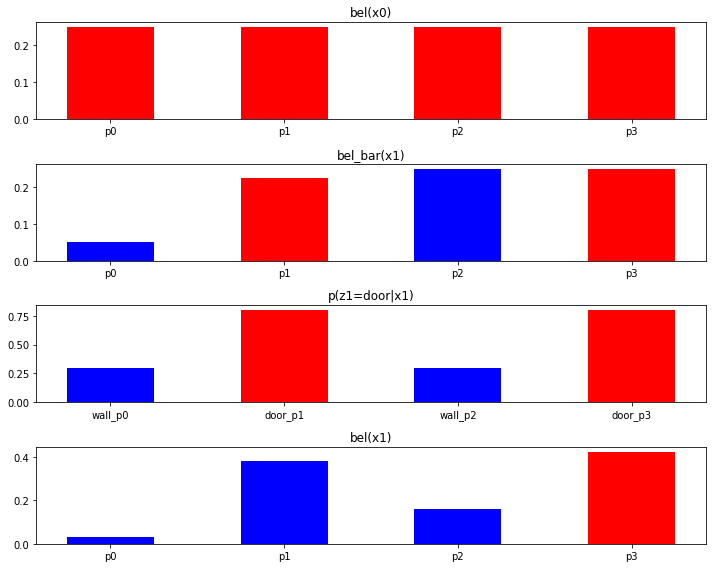


At step t=2, after the control u2, the robot returns a measurement of z2 =wall.

State Transition Probability: 
(x2 = p0|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.2, 0, 0, 0]
(x2 = p1|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.7, 0.2, 0, 0]
(x2 = p2|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0.1, 0.7, 0.2, 0]
(x2 = p3|u2,x1=p0, x1=p1,x1=p2, x1=p3)=  [0, 0.1, 0.7, 0.2]

Calculations of bel_bar for all potential locations (p0~p3): 
bel_bar(x2=p0)=  0.006
bel_bar(x2=p1)=  0.099
bel_bar(x2=p2)=  0.303
bel_bar(x2=p3)=  0.235

Probability of the robot sensing the wall at step = 2:
p(z2 = wall|x2=p0)= 0.7
p(z2 = wall|x2=p1)= 0.2
p(z2 = wall|x2=p2)= 0.7
p(z2 = wall|x2=p3)= 0.2

Normalization and η calculation: 
bel(x2 = p0) = p(z2 = wall|x2=p0)*bel_bar(x2 = p0)*η = 0.004*η
bel(x2 = p1) = p(z2 = wall|x2=p1)*bel_bar(x2 = p1)*η = 0.02*η
bel(x2 = p2) = p(z2 = wall|x2=p2)*bel_bar(x2 = p2)*η = 0.212*η
bel(x2 = p3) = p(z2 = wall|x2=p3)*bel_bar(x2 = p3)*η = 0.047*η
η = 1/0.284 =  3.527

New updated belief of the robot's loca

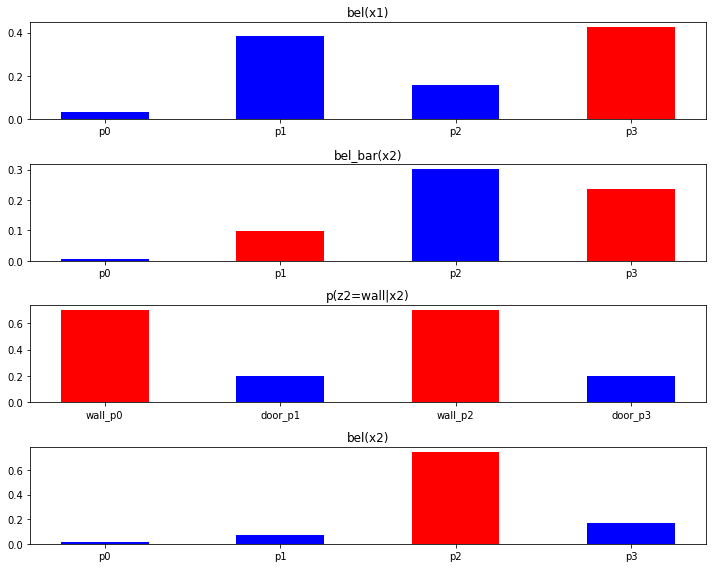


At step t=3, after the control u3, the robot returns a measurement of z3 =door.

State Transition Probability: 
(x3 = p0|u3,x2=p0, x2=p1,x2=p2, x2=p3)=  [0.2, 0, 0, 0]
(x3 = p1|u3,x2=p0, x2=p1,x2=p2, x2=p3)=  [0.7, 0.2, 0, 0]
(x3 = p2|u3,x2=p0, x2=p1,x2=p2, x2=p3)=  [0.1, 0.7, 0.2, 0]
(x3 = p3|u3,x2=p0, x2=p1,x2=p2, x2=p3)=  [0, 0.1, 0.7, 0.2]

Calculations of bel_bar for all potential locations (p0~p3): 
bel_bar(x3=p0)=  0.003
bel_bar(x3=p1)=  0.025
bel_bar(x3=p2)=  0.2
bel_bar(x3=p3)=  0.564

Probability of the robot sensing the door at step = 3:
p(z3 = door|x3=p0)= 0.3
p(z3 = door|x3=p1)= 0.8
p(z3 = door|x3=p2)= 0.3
p(z3 = door|x3=p3)= 0.8

Normalization and η calculation: 
bel(x3 = p0) = p(z3 = door|x3=p0)*bel_bar(x3 = p0)*η = 0.001*η
bel(x3 = p1) = p(z3 = door|x3=p1)*bel_bar(x3 = p1)*η = 0.02*η
bel(x3 = p2) = p(z3 = door|x3=p2)*bel_bar(x3 = p2)*η = 0.06*η
bel(x3 = p3) = p(z3 = door|x3=p3)*bel_bar(x3 = p3)*η = 0.451*η
η = 1/0.532 =  1.879

New updated belief of the robot's localiz

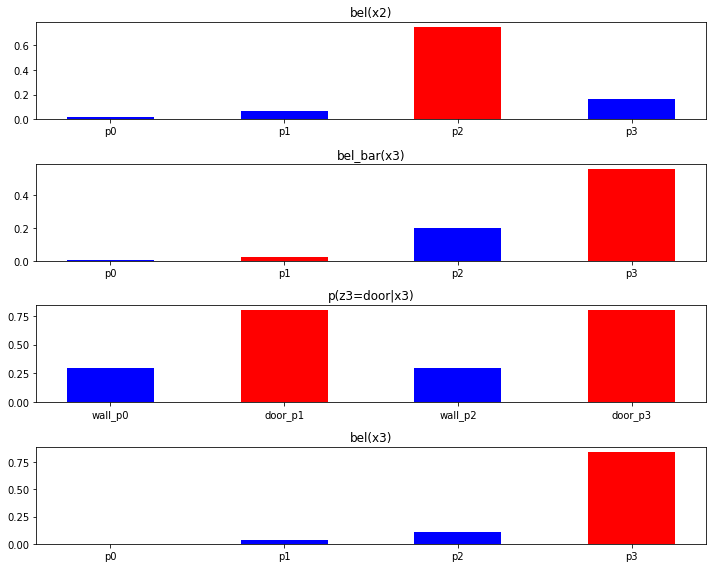

In [2]:
robot_localization(3)